<a href="https://colab.research.google.com/github/ProvenDruid/ANN/blob/main/the_querties_and__the_learningrates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import torch
import torch.nn as nn
import numpy as np

import matplotlib.pyplot as plt
from IPython import display
from matplotlib_inline.backend_inline import set_matplotlib_formats
np.set_printoptions(suppress=True)

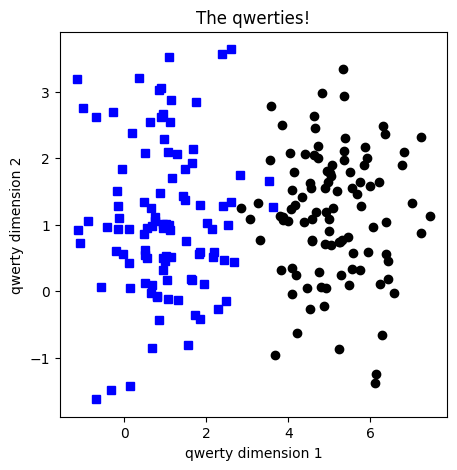

In [ ]:
#rcreate data
nPerClust=100
blur=1

A=[1,1]
B=[5,1]

#generate the data
a=[A[0]+np.random.randn(nPerClust)*blur, A[1]+np.random.randn(nPerClust)*blur]
b=[B[0]+np.random.randn(nPerClust)*blur, B[1]+np.random.randn(nPerClust)*blur]

#true labels
labels_np=np.vstack((np.zeros((nPerClust,1)), np.ones((nPerClust,1))))

#concatenate into a matrix
data_np=np.hstack((a,b)).T

#convert to a pytorch tensor
data=torch.tensor(data_np).float()
labels=torch.tensor(labels_np).float()

#show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [ ]:
# inspect types
print(type(data_np))
print(data_np.shape)
print(' ')

print(type(data))
print(np.shape(data))

<class 'numpy.ndarray'>
(200, 2)
 
<class 'torch.Tensor'>
torch.Size([200, 2])


In [ ]:
# build the model
ANNclassify = nn.Sequential(
    nn.Linear(2,1),   # input layer has 2 inputs this time
    nn.ReLU(),        # activation unit
    nn.Linear(1,1),   # output unit
    nn.Sigmoid(),     # final activation unit (here for conceptual reasons; in practice, better to use BCEWithLogitsLoss)
      )

ANNclassify

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

In [ ]:
# other model features

learningRate = .01

# loss function
lossfun = nn.BCELoss() #binary-cross-entropy for classification
# Note: You'll learn in the "Metaparameters" section that it's better to use BCEWithLogitsLoss, but this is OK for now.

# optimizer
optimizer = torch.optim.SGD(ANNclassify.parameters(),lr=learningRate)#classical gradient descent

In [ ]:
# train the model
numepochs = 1000
losses = torch.zeros(numepochs)

for epochi in range(numepochs):

  # forward pass
  yHat = ANNclassify(data)

  # compute loss
  loss = lossfun(yHat,labels)
  losses[epochi] = loss

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

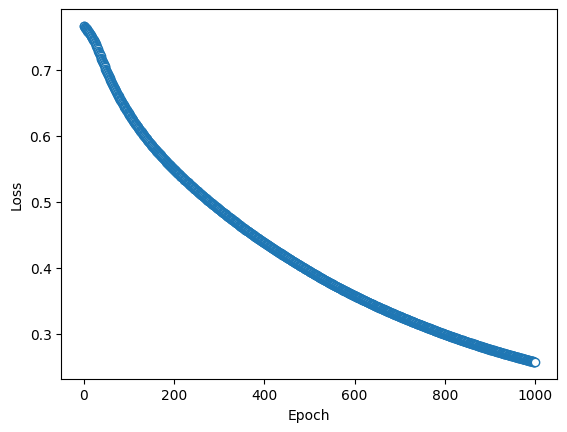

In [ ]:
# show the losses

plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
losses.detach()[-1]

tensor(0.2577)

In [ ]:
# compute the predictions

# manually compute losses
# final forward pass
predictions = ANNclassify(data)

predlabels = predictions>.5

# find errors
misclassified = np.where(predlabels != labels)[0]

# total accuracy
totalacc = 100-100*len(misclassified)/(2*nPerClust)

print('Final accuracy: %g%%' %totalacc)

Final accuracy: 93%


In [ ]:
predictions


tensor([[-4.8970e+00],
        [-3.5738e+00],
        [-6.9380e+00],
        [-6.6269e+00],
        [-5.8862e+00],
        [-2.1283e+00],
        [-7.4295e+00],
        [-8.0104e+00],
        [-8.1868e+00],
        [-2.3873e+00],
        [-6.7744e+00],
        [-4.4364e+00],
        [-4.8955e+00],
        [-7.0425e+00],
        [-4.5689e+00],
        [-1.3812e+00],
        [-5.7197e+00],
        [-5.3308e+00],
        [-2.3806e+00],
        [-5.3688e+00],
        [-5.7529e+00],
        [-1.2506e+00],
        [-5.1724e+00],
        [-6.2234e+00],
        [-5.4006e+00],
        [-5.2282e+00],
        [-7.6060e+00],
        [-1.2878e+00],
        [-4.6650e+00],
        [-4.6096e+00],
        [-3.0469e+00],
        [-6.9754e+00],
        [-5.3587e+00],
        [-2.6927e+00],
        [-4.2697e+00],
        [-8.0677e+00],
        [-7.3901e+00],
        [-7.8433e-01],
        [-7.0050e+00],
        [-3.5543e+00],
        [-7.3944e+00],
        [-1.8696e+00],
        [-7.3768e+00],
        [-4

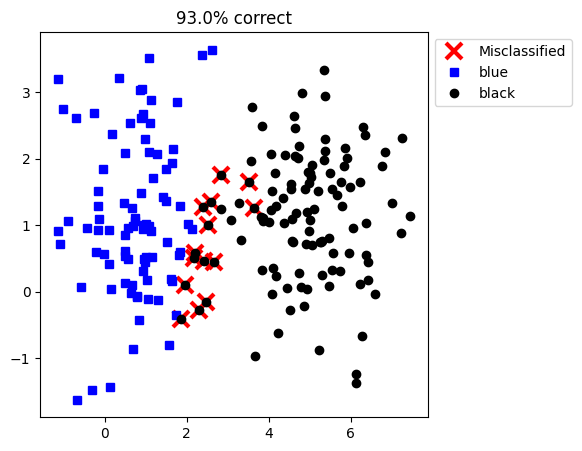

In [ ]:
# plot the labeled data
fig = plt.figure(figsize=(5,5))
plt.plot(data[misclassified,0] ,data[misclassified,1],'rx',markersize=12,markeredgewidth=3)
plt.plot(data[np.where(~predlabels)[0],0],data[np.where(~predlabels)[0],1],'bs')
plt.plot(data[np.where(predlabels)[0],0] ,data[np.where(predlabels)[0],1] ,'ko')

plt.legend(['Misclassified','blue','black'],bbox_to_anchor=(1,1))
plt.title(f'{totalacc}% correct')
plt.show()

In [ ]:
#functions create the model
def createANNmodel(learningRate):
  ANNclassify=nn.Sequential(
      nn.Linear(2,1),
      nn.ReLU(),
      nn.Linear(1,1),
  )

  #loss function
  lossfun=nn.BCEWithLogitsLoss()

  #optimizer
  optimizer=torch.optim.SGD(ANNclassify.parameters(), lr=learningRate)

  #model output
  return ANNclassify,lossfun,optimizer

In [ ]:
#function to train
numepochs=1000
def trainTheModel(ANNmodel):

  #initialize losses
  losses=torch.zeros(numepochs)

  #loop over epochs
  for epochi in range(numepochs):

    #forward pass
    yHat=ANNmodel(data)

    #compute the loss
    loss=lossfun(yHat,labels)
    losses[epochi]=loss

    #backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  #final forward pass
  predictions=ANNmodel(data)

  # compute the predictions and report accuracy
  # NOTE: shouldn't it be predictions>.5??
  totalacc = 100*torch.mean(((predictions>0) == labels).float())

  return losses,predictions,totalacc


final accuracy: 95%


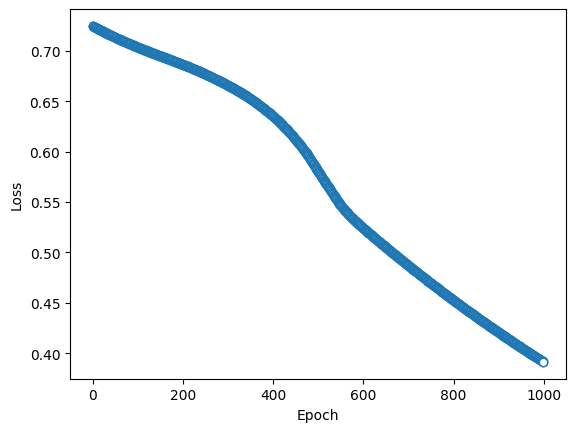

In [ ]:
#testing everything once
#create it

ANNclassify,lossfun,optimizer=createANNmodel(.01)

#train it
losses,predictions,totalacc=trainTheModel(ANNclassify)

#show it
print("final accuracy: %g%%" %totalacc)

#plot it
plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch'), plt.ylabel('Loss')
plt.show()

In [ ]:
# the set of learning rates to test
learningrates = np.linspace(.001,.1,40)

# initialize results output
accByLR = []
allLosses = np.zeros((len(learningrates),numepochs))


# loop through learning rates
for i,lr in enumerate(learningrates):

  # create and run the model
  ANNclassify,lossfun,optimizer = createANNmodel(lr)
  losses,predictions,totalacc = trainTheModel(ANNclassify)

  # store the results
  accByLR.append(totalacc)
  allLosses[i,:] = losses.detach()

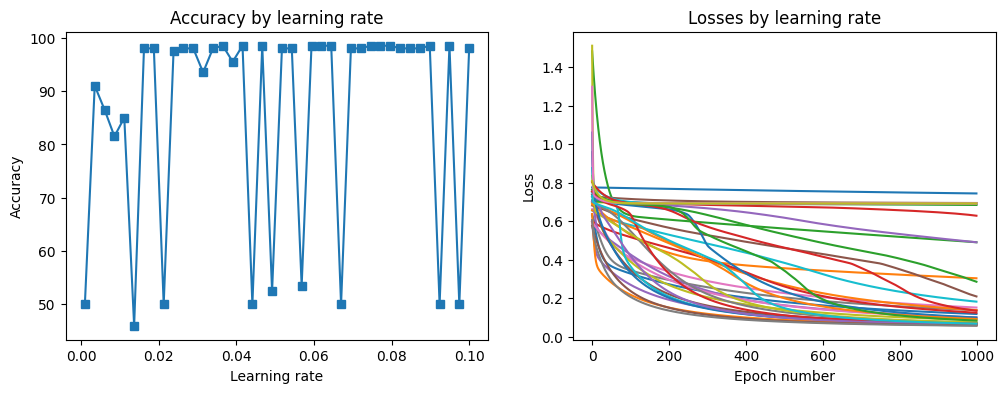

In [ ]:
# plot the results
fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(learningrates,accByLR,'s-')
ax[0].set_xlabel('Learning rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by learning rate')

ax[1].plot(allLosses.T)
ax[1].set_title('Losses by learning rate')
ax[1].set_xlabel('Epoch number')
ax[1].set_ylabel('Loss')
plt.show()

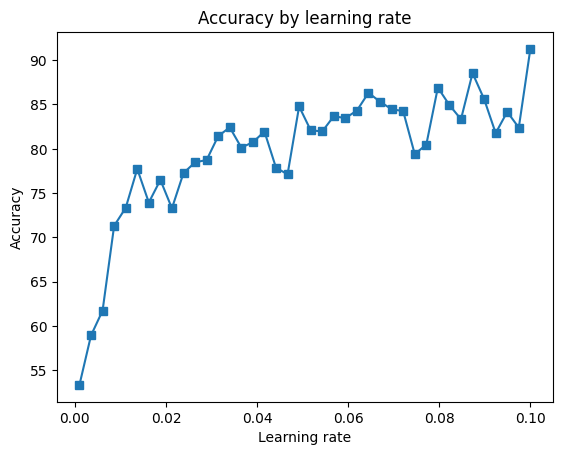

In [ ]:
# run a "meta-experiment" by repeating the experiment N times
#  (different random weight initializations each time)
# note: this cell takes ~7 mins.

# number of times to iterate through the experiment
numExps = 50

# matrix to store all results
accMeta = np.zeros((numExps,len(learningrates)))

# fewer epochs to reduce computation time
numepochs = 500

# now for the experiment
for expi in range(numExps):
  for i,lr in enumerate(learningrates):

    # create and run the model
    ANNclassify,lossfun,optimizer = createANNmodel(lr)
    losses,predictions,totalacc = trainTheModel(ANNclassify)

    # store the results
    accMeta[expi,i] = totalacc



# now plot the results, averaged over experiments
plt.plot(learningrates,np.mean(accMeta,axis=0),'s-')
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.title('Accuracy by learning rate')
plt.show()

In [ ]:
accMeta.shape

(50, 40)